In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv("DigitalAd_dataset.csv")
print(data1.shape)
print(data1.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [3]:
x = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

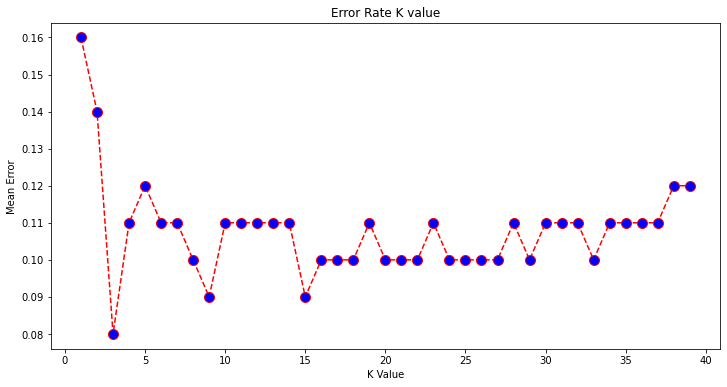

In [6]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

mp.figure(figsize = (12,6))
mp.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o',markerfacecolor = 'blue',markersize = 10)
mp.title("Error Rate K value")
mp.xlabel('K Value')
mp.ylabel('Mean Error')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski',p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
print(result)
if result == 1:
    print("Customer will buy")
else:
    print("Customer won't buy")

Enter New Customer Age: 34
Enter New Customer Salary: 50000
[0]
Customer won't buy


In [9]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

print(cm)
print("Accuracy of the model : {0}%".format(accuracy_score(y_test,y_pred)*100))

[[57  4]
 [ 4 35]]
Accuracy of the model : 92.0%


# End of Module